In [1]:
# needed imports
import numpy as np
from numpy import empty
import matplotlib.pyplot as plt

# B-Splines

We recall the Cox-DeBoor formula, used as a definition for B-Splines:

The j-th B-spline of degree $p$ is defined by the recurrence relation:
\begin{align}
  N_j^p = \frac{t-t_j}{t_{j+p}-t_{j}} N_j^{p-1} + \frac{t_{j+p+1}-t}{t_{j+p+1}-t_{j+1}} N_{j+1}^{p-1},
  \label{eq:bspline-reccurence}
\end{align}

where $T=\{t_i\}_{0\leqslant i \leqslant m}$ is a sequence of non-decreasing real numbers, called the knot vector.

## Examples

**Example 1.**

We consider a linear B-Spline with the knot vector $T = [0, 1, 2]$

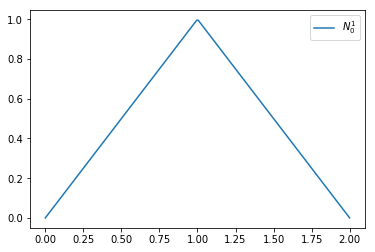

In [2]:
def N1_0(t):
    if t >= 0 and t< 1: return t
    if t >= 1 and t< 2: return 2-t
    return 0.

xs = np.linspace(0., 2., 200)
plt.plot(xs, [N1_0(x) for x in xs], label='$N_0^1$')
plt.legend()

**Example 2.**

We consider a linear B-Spline with the knot vector $T = [0, 0, 1]$

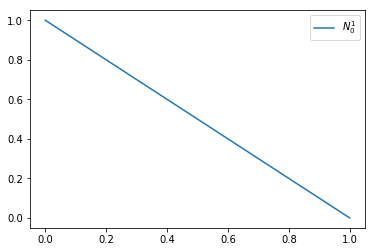

In [3]:
def N1_0(t):
    if t >= 0 and t< 1: return 1-t
    return 0.

xs = np.linspace(0., 1., 200)
plt.plot(xs, [N1_0(x) for x in xs], label='$N_0^1$')
plt.legend()

**Example 3.**

We consider a linear B-Spline with the knot vector $T = [0, 1, 1]$

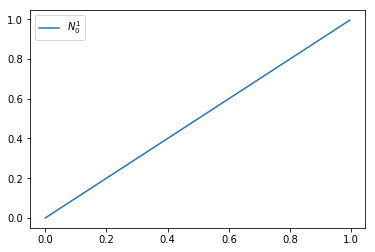

In [4]:
def N1_0(t):
    if t >= 0 and t< 1: return t
    return 0.

xs = np.linspace(0., 1., 201)[:-1]
plt.plot(xs, [N1_0(x) for x in xs], label='$N_0^1$')
plt.legend()

**Example 4.**

We consider linear B-Splines with the knot vector $T = [0, 0, 1, 1]$

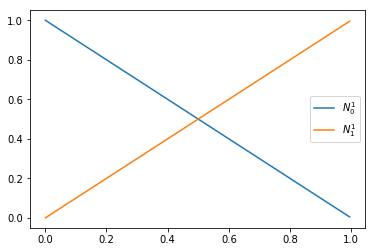

In [5]:
def N1_0(t):
    if t >= 0 and t< 1: return 1-t
    return 0.

def N1_1(t):
    if t >= 0 and t< 1: return t
    return 0.

xs = np.linspace(0., 1., 201)[:-1]
plt.plot(xs, [N1_0(x) for x in xs], label='$N_0^1$')
plt.plot(xs, [N1_1(x) for x in xs], label='$N_1^1$')
plt.legend()

**Example 5.**

We consider linear B-Splines with the knot vector $T = [0, 0, 1, 2]$

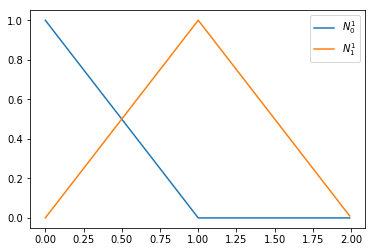

In [6]:
def N1_0(t):
    if t >= 0 and t< 1: return 1-t
    return 0.

def N1_1(t):
    if t >= 0 and t< 1: return t
    if t >= 1 and t< 2: return 2-t
    return 0.

xs = np.linspace(0., 2., 201)[:-1]
plt.plot(xs, [N1_0(x) for x in xs], label='$N_0^1$')
plt.plot(xs, [N1_1(x) for x in xs], label='$N_1^1$')
plt.legend()

**Example 6.**

We consider a quadratic B-Spline with the knot vector $T = [0, 0, 1, 1]$

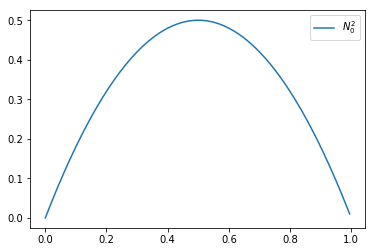

In [7]:
def N2_0(t):
    if t >= 0 and t< 1: return 2*t*(1-t)
    return 0.

xs = np.linspace(0., 1., 201)[:-1]
plt.plot(xs, [N2_0(x) for x in xs], label='$N_0^2$')
plt.legend()

**Example 7.**

We consider a quadratic B-Spline with the knot vector $T = [0, 0, 1, 2]$

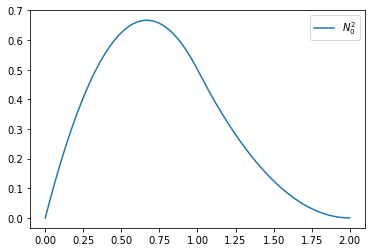

In [8]:
T = [0, 0, 1, 2]
def N2_0(t):
    if t >= 0 and t< 1: return 2*t-3./2.*t**2
    if t >= 1 and t< 2: return 0.5*(2-t)**2
    return 0.

xs = np.linspace(0., 2., 200)
plt.plot(xs, [N2_0(x) for x in xs], label='$N_0^2$')
plt.legend()

**Example 8.**

We consider linear B-Splines with the knot vector $T = [0, 0, 1, 2, 3, 3]$

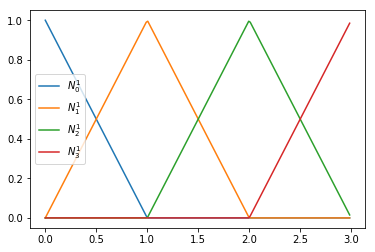

In [9]:
def N1_0(t):
    if t >= 0 and t< 1: return 1-t
    return 0.

def N1_1(t):
    if t >= 0 and t< 1: return t
    if t >= 1 and t< 2: return 2-t
    return 0.

def N1_2(t):
    if t >= 1 and t< 2: return t-1
    if t >= 2 and t< 3: return 3-t
    return 0.

def N1_3(t):
    if t >= 2 and t< 3: return t-2
    return 0.


xs = np.linspace(0., 3., 201)[:-1]
plt.plot(xs, [N1_0(x) for x in xs], label='$N_0^1$')
plt.plot(xs, [N1_1(x) for x in xs], label='$N_1^1$')
plt.plot(xs, [N1_2(x) for x in xs], label='$N_2^1$')
plt.plot(xs, [N1_3(x) for x in xs], label='$N_3^1$')
plt.legend()

**Example 9.**

We consider quadratic B-Splines with the knot vector $T = [0, 0, 0, 1, 1, 1]$

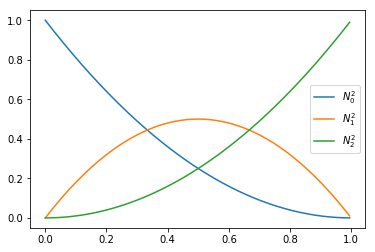

In [10]:
def N2_0(t):
    if t >= 0 and t< 1: return (1-t)**2
    return 0.

def N2_1(t):
    if t >= 0 and t< 1: return 2*t*(1-t)
    return 0.

def N2_2(t):
    if t >= 0 and t< 1: return t**2
    return 0.

xs = np.linspace(0., 1., 201)[:-1]
plt.plot(xs, [N2_0(x) for x in xs], label='$N_0^2$')
plt.plot(xs, [N2_1(x) for x in xs], label='$N_1^2$')
plt.plot(xs, [N2_2(x) for x in xs], label='$N_2^2$')
plt.legend()

## Evaluation of B-Splines

Given a knot sequence $T=\{t_i\}_{0\leqslant i \leqslant n + p}$, we are interested in the algorithmic evaluation of B-Splines of degree $p$. For a given real point $x$, it is done in two steps:

1. find the knot span index $j$, such that $x \in~ ] t_j,t_{j+1} [ $  
2. evaluate all non-vanishing B-Splines $N_{j-p}^p, \cdots, N_j^p$ 

The first point is achieved by the function implemented by the following function:


In [11]:
def find_span( knots, degree, x ):
    # Knot index at left/right boundary
    low  = degree
    high = 0
    high = len(knots)-1-degree

    # Check if point is exactly on left/right boundary, or outside domain
    if x <= knots[low ]: returnVal = low
    elif x >= knots[high]: returnVal = high-1
    else:
        # Perform binary search
        span = (low+high)//2
        while x < knots[span] or x >= knots[span+1]:
            if x < knots[span]:
                high = span
            else:
                low  = span
            span = (low+high)//2
        returnVal = span

    return returnVal

The second point is implemented by the following function, that returns all non-vanishing B-Splines at $x$

In [12]:
def all_bsplines( knots, degree, x, span ):
    left   = empty( degree  , dtype=float )
    right  = empty( degree  , dtype=float )
    values = empty( degree+1, dtype=float )

    values[0] = 1.0
    for j in range(0,degree):
        left [j] = x - knots[span-j]
        right[j] = knots[span+1+j] - x
        saved    = 0.0
        for r in range(0,j+1):
            temp      = values[r] / (right[r] + left[j-r])
            values[r] = saved + right[r] * temp
            saved     = left[j-r] * temp
        values[j+1] = saved

    return values

The following function plots all B-Splines given a knot vector and a polynomial degree.

In [13]:
def plot_splines(knots, degree, nx=100):
    xmin = knots[degree]
    xmax = knots[-degree-1]
    
    # grid points for evaluation
    xs = np.linspace(xmin,xmax,nx)

    # this is the number of the BSplines in the Schoenberg space
    N = len(knots) - degree - 1

    ys = np.zeros((N,nx), dtype=np.double)
    for ix,x in enumerate(xs):
        span = find_span( knots, degree, x )    
        b    = all_bsplines( knots, degree, x, span )  
        ys[span-degree:span+1, ix] = b[:]
        
    for i in range(0,N):
        plt.plot(xs,ys[i,:], label='$N_{}$'.format(i+1))
    plt.legend(loc=9, ncol=4)

### Knots vector families

There are two kind of **knots vectors**, called **clamped** and **unclamped**. Both families contains **uniform** and **non-uniform** sequences. 

The following are examples of such knots vectors

#### Clamped knots (open knots vector)

##### uniform

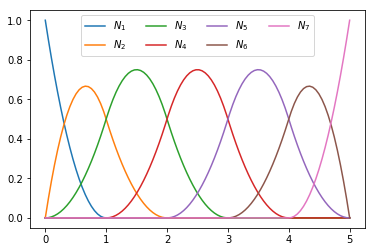

In [14]:
T = np.array([0, 0, 0, 1, 2, 3, 4, 5, 5, 5])

plot_splines(T, degree=2, nx=100)

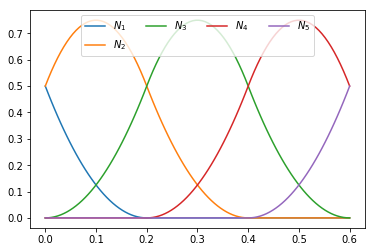

In [15]:
T = [-0.2, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 0.8]

plot_splines(T, degree=2, nx=100)

##### non-uniform 

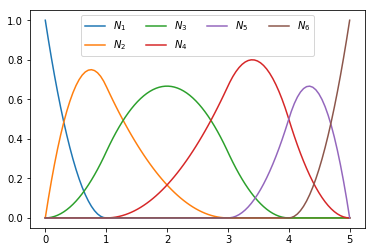

In [16]:
T = [0, 0, 0, 1, 3, 4, 5, 5, 5]

plot_splines(T, degree=2, nx=100)

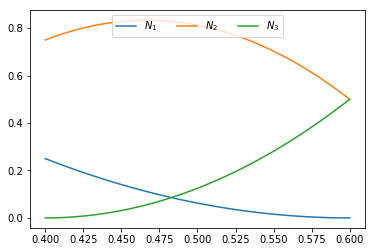

In [17]:
T = [-0.2, -0.2, 0.4, 0.6, 0.8, 0.8]

plot_splines(T, degree=2, nx=100)

#### Unclamped knots

##### uniform

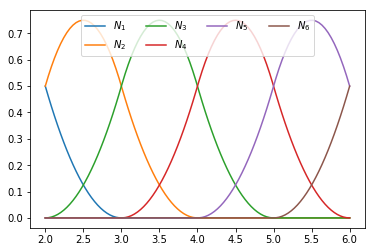

In [18]:
T = [0, 1, 2, 3, 4, 5, 6, 7, 8]

plot_splines(T, degree=2, nx=100)

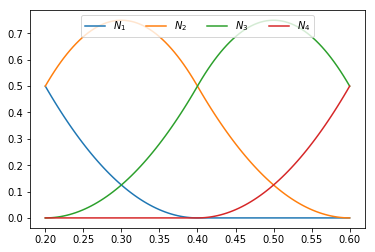

In [19]:
T = [-0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

plot_splines(T, degree=2, nx=100)

##### non-uniform 

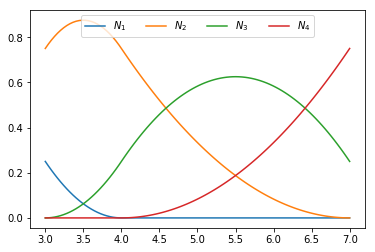

In [20]:
T = [0, 0, 3, 4, 7, 8, 9]

plot_splines(T, degree=2, nx=100)

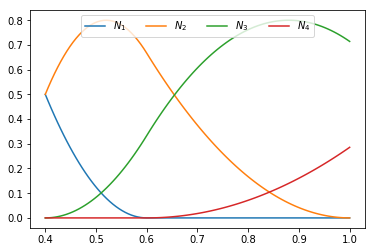

In [21]:
T = [-0.2, 0.2, 0.4, 0.6, 1.0, 2.0, 2.5]

plot_splines(T, degree=2, nx=100)

In [22]:
# css style
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()